In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import csv
import re



import pandas as pd
import numpy as np

import enlighten

from IPython.core.display import HTML
from IPython.display import SVG, Image, display

#RDKit related imports
from rdkit import RDLogger
from rdkit.Chem import PandasTools, AllChem as Chem, Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Draw
from rdkit import DataStructs

#scikit imports
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV



#tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorflow_decision_forests as tfdf

RDLogger.logger().setLevel(RDLogger.CRITICAL)

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

/home/nathaniel/anaconda3/envs/assay_ML/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from datetime import datetime
import glob

In [4]:
import psutil
memory = psutil.virtual_memory()
print(f" {'*' * 3} Memory used percentage - {memory.percent} \n {'*' * 4} Free Memory available - { round(memory.free / (1024.0 ** 3))} GB")

 *** Memory used percentage - 16.5 
 **** Free Memory available - 17 GB


In [6]:
global assay
assay  = 1511
# assay = 651820

In [5]:
# dir = f'{assay}_OUTPUT'
dir = f'{assay}_2d_CLEAN_dir'

In [6]:
try:
    os.mkdir(dir)    
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [ ]:
# import process_data

In [ ]:
# process_data.get_assay_info(assay)

In [ ]:
assay_csvpath = f'./BACKUP/{assay}_backup.csv'

In [ ]:
assayframe = pd.read_csv(assay_csvpath)

In [ ]:
CID_LIST = assayframe.PUBCHEM_CID.values.tolist()

In [ ]:
with open(f'{assay}_cidlist.txt', 'w') as cidfile:
    for i in CID_LIST:
        cidfile.write(str(i) + '\n')

### At this point use the CID list to download the SDFs from PubChem

In [ ]:
#input csv to get CIDS

INPUT_ASSAY_CSV = f'./BACKUP/{assay}_backup.csv'

In [ ]:
PubChem_csvframe = pd.read_csv(INPUT_ASSAY_CSV)

In [ ]:
PubChem_csvframe.head(5)

In [ ]:
# padel_desc_file = pd.read_csv(f'{assay}_descriptors.csv')
padel_desc_file = pd.read_csv(f'{assay}_2d_descriptors.csv')

In [ ]:
padel_desc_file = padel_desc_file.rename(columns={'Name': 'PUBCHEM_CID'})

In [ ]:
padel_desc_file.head(5)

In [ ]:
#lol this was way easier
comb_df = pd.merge(PubChem_csvframe, padel_desc_file, on='PUBCHEM_CID')

In [ ]:
comb_df = comb_df.drop_duplicates(subset=['PUBCHEM_CID'])

In [ ]:
comb_df.head(5)

In [ ]:
comb_df = comb_df.drop(columns=['PUBCHEM_ASSAY_ID', 'PUBCHEM_SID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_SCORE'])

In [ ]:
comb_df = comb_df.drop(comb_df[comb_df.PUBCHEM_ACTIVITY_OUTCOME == 'Inconclusive'].index)

In [ ]:
comb_df["PUBCHEM_ACTIVITY_OUTCOME"].replace("Inactive", 0, inplace=True)
comb_df["PUBCHEM_ACTIVITY_OUTCOME"].replace("Active", 1, inplace=True)

In [ ]:
comb_df.head(5)

In [ ]:
nan_cols = comb_df.isnull().sum(axis=0)
nan_cols.to_csv(f'{dir}/nancols.csv')

In [ ]:
check_cols = pd.read_csv(f'{dir}/nancols.csv')


In [ ]:
comb_df = comb_df[comb_df.columns[comb_df.isnull().sum() < 1000]]

In [ ]:
nan_cols = comb_df.isnull().sum(axis=0)
nan_cols.to_csv(f'{dir}/nancols2.csv')

In [ ]:
cmb_df_cp = comb_df.copy()

In [ ]:
cmb_df_cp = cmb_df_cp.dropna()

In [ ]:
nan_cols = cmb_df_cp.isnull().sum(axis=0)
nan_cols.to_csv(f'{dir}/nancols3.csv')

In [ ]:
inf_vals = np.isfinite(cmb_df_cp).sum()

In [ ]:
inf_vals.to_csv(f'{dir}/isfinite.csv')

In [ ]:
cmb_df_cp = cmb_df_cp.replace([np.inf, -np.inf], np.nan)

In [ ]:
cmb_df_cp = cmb_df_cp.dropna()

In [ ]:
inf_vals = np.isfinite(cmb_df_cp).sum()

In [ ]:
inf_vals.to_csv(f'{dir}/isfinite2.csv')

In [ ]:
cmb_df_cp.to_csv(f'{dir}/{assay}_treated_data.csv', index=False)

In [65]:
# start here if it all crashed lol
cmb_df_cp = pd.read_csv(f'{dir}/{assay}_treated_data.csv')

In [66]:
cmb_df_cp.head(5)

,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1988,0,0,42.859860,0,0,38,18,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,425322,0,0,42.575067,0,0,38,19,19,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24981957,0,0,66.557825,0,0,56,31,25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7384392,0,0,56.975032,0,0,50,26,24,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7423030,0,0,46.243102,0,0,38,24,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ACTIVITY_LABELS = cmb_df_cp['PUBCHEM_ACTIVITY_OUTCOME'].to_numpy()
CID_markers = cmb_df_cp['PUBCHEM_CID'].to_numpy()

In [67]:
cmb_df_cp = cmb_df_cp.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_CID'])

In [69]:
cmb_df_cp.head(5)

,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,42.859860,0,0,38,18,20,0,14,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,42.575067,0,0,38,19,19,0,15,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,66.557825,0,0,56,31,25,0,23,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,56.975032,0,0,50,26,24,0,16,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,46.243102,0,0,38,24,14,0,15,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# from sklearn.feature_selection import VarianceThreshold

# # selector = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
# selector = VarianceThreshold()
# VT_out = selector.fit_transform(cmb_df_cp)
# selected_feature_names = selector.get_feature_names_out()


In [ ]:
np_padel_desc = cmb_df_cp.to_numpy()

In [ ]:
# del PubChem_csvframe
# del padel_desc_file
# del comb_df

In [ ]:
np_padel_desc.shape

In [ ]:
np_padel_desc[0]

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
selector = VarianceThreshold()
VT_out = selector.fit_transform(np_padel_desc)
selected_feature_names = selector.get_feature_names_out()


In [79]:
#use the VT features to remove these from the input
with open(f'{dir}/{assay}_model_VT_features.txt', 'w') as vtfeat:
    for i in selected_feature_names:
        vtfeat.write(i + ',')

In [ ]:
VT_out.shape

In [ ]:
VT_out[0]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scaler_out = scaler.fit_transform(VT_out)

In [ ]:
print(Scaler_out.shape)
print(ACTIVITY_LABELS.shape)
print(CID_markers.shape)


In [ ]:
x_train, x_test, y_train, y_test, CID_train, CID_test = train_test_split(Scaler_out, ACTIVITY_LABELS, CID_markers, random_state=20)

In [ ]:
scaler_df = pd.DataFrame(Scaler_out)

In [ ]:
scaler_df.to_csv(f'{dir}/{assay}_scaled_data.csv')

In [ ]:
np.savetxt(f'./{dir}/y_train.txt', y_train, fmt='%d')
np.savetxt(f'./{dir}/x_train.txt', x_train)
np.savetxt(f'./{dir}/y_test.txt', y_test, fmt='%d')
np.savetxt(f'./{dir}/x_test.txt', x_test)
np.savetxt(f'./{dir}/CID_train.txt', CID_train, fmt='%d')
np.savetxt(f'./{dir}/CID_test.txt', CID_test, fmt='%d')

## At this point restart the kernel as it will have used up far too much virtual memory

In [6]:
x_train = pd.read_csv(f'./{dir}/x_train.txt', delimiter=" ")
y_train = pd.read_csv(f'./{dir}/y_train.txt', delimiter=",")
x_test = pd.read_csv(f'./{dir}/x_test.txt', delimiter=" ")
y_test = pd.read_csv(f'./{dir}/y_test.txt', delimiter=",")

In [7]:
from collections import Counter

In [8]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train).reshape(-1)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test).reshape(-1)

# x_val_np = np.array(x_val)
# y_val_np = np.array(y_val)


In [9]:
y_train.shape

(222565, 1)

In [10]:
ratio = round((Counter(y_train_np)[0]) / Counter(y_train_np)[1])

In [11]:
x_train_np.shape

(222565, 1823)

In [12]:
y_train_np

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
y_test_actives = []
x_test_actives = []

for ID, i in enumerate(y_train_np):
    if i == 1:
        y_test_actives.append(i)
        x_test_actives.append(x_train_np[ID])



In [15]:
y_test_actives = np.array(y_test_actives)
x_test_actives = np.array(x_test_actives)

In [16]:
y_test_actives

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
x_train_np[0]

array([-0.26130973,  1.21017505,  1.078444  , ..., -0.01231516,
       -0.00317954, -0.01022126])

In [18]:
CID_train_markers = pd.read_csv(f'./{dir}/CID_train.txt', delimiter=",")
CID_test_markers = pd.read_csv(f'./{dir}/CID_test.txt', delimiter=",")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import History, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.models
import tensorflow as tf

In [14]:
from sklearn.metrics import recall_score


def f1_score_threshold(threshold=0.5):
    def f1_score(y_true, y_predict):
        threshold_value = threshold
        y_predict = tf.cast(tf.greater(tf.clip_by_value(y_predict, 0, 1), threshold_value), tf.float32)
        true_pos = tf.round(tf.reduce_sum(tf.clip_by_value(y_true * y_predict, 0, 1)))
        pred_pos = tf.reduce_sum(y_predict)
        prec_rat = true_pos / (pred_pos + 10e-6)

        poss_pos = tf.reduce_sum(tf.clip_by_value(y_true, 0, 1))
        recall_ratio = true_pos / (poss_pos + 10e-6)

        return (2 * recall_ratio * prec_rat) / (recall_ratio + prec_rat + 10e-6)
    
    return f1_score

In [15]:
model = Sequential([
    #Input
    Dense(units=2000, input_dim=x_train_np.shape[1], activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(units=500, activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(units=10, activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(1, activation='sigmoid')
])

2022-11-25 15:00:31.193192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:00:31.222580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:00:31.222720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:00:31.223240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              3648000   
                                                                 
 batch_normalization (BatchN  (None, 2000)             8000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               1000500   
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [17]:
class_weight = {0: 1, 1:ratio}

In [18]:
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')

model.save_weights(initial_weights)

optimiser = Adam(lr=0.0001)
model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=[f1_score_threshold(0.5), 'acc'])

model.load_weights(initial_weights)

/home/nathaniel/anaconda3/envs/assay_ML/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


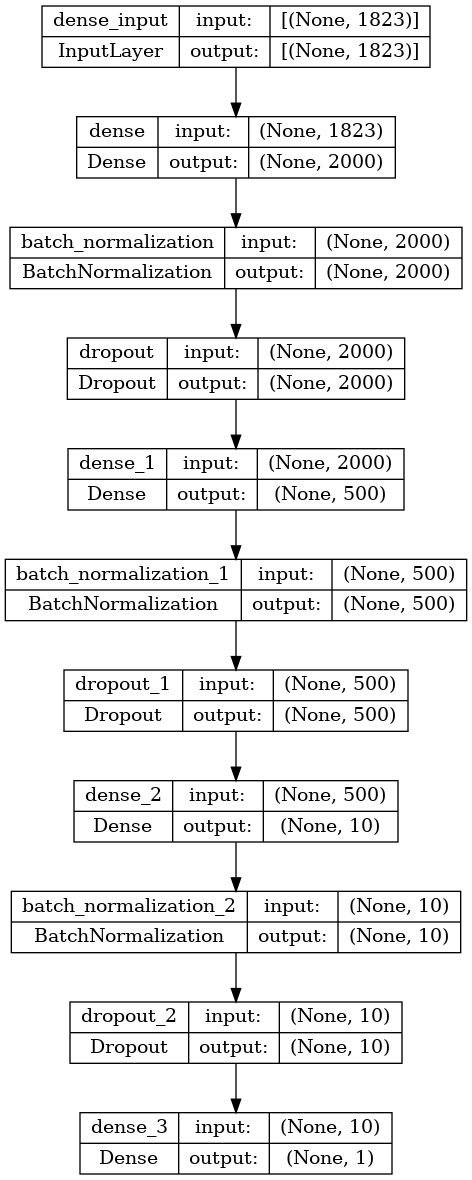

In [20]:
image_model = tf.keras.utils.plot_model(model, f"{assay}_model.png", show_shapes=True)
display(Image(filename="RNN_de_novo_generator.png"))

In [21]:
history = model.fit(x_train_np, y_train_np, batch_size=256, epochs=20, class_weight=class_weight)

Epoch 1/200
 54/870 [>.............................] - ETA: 2s - loss: 2.6116 - f1_score: 0.0095 - acc: 0.4879

2022-11-25 15:01:16.266642: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


870/870 [==============================] - 4s 3ms/step - loss: 2.0354 - f1_score: 0.0114 - acc: 0.5066
Epoch 2/200
870/870 [==============================] - 2s 3ms/step - loss: 1.8227 - f1_score: 0.0113 - acc: 0.5176
Epoch 3/200
870/870 [==============================] - 2s 3ms/step - loss: 1.6860 - f1_score: 0.0122 - acc: 0.5183
Epoch 4/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5713 - f1_score: 0.0123 - acc: 0.5298
Epoch 5/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5511 - f1_score: 0.0126 - acc: 0.5348
Epoch 6/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5773 - f1_score: 0.0133 - acc: 0.5417
Epoch 7/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4995 - f1_score: 0.0141 - acc: 0.5524
Epoch 8/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4520 - f1_score: 0.0143 - acc: 0.5658
Epoch 9/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4178 - f1_score

dict_keys(['loss', 'f1_score', 'acc'])


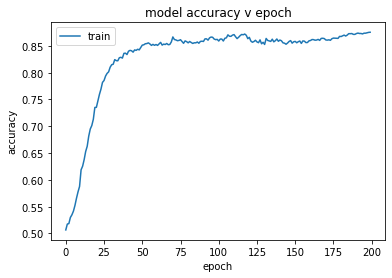

In [30]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('model accuracy v epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# plt.show()

plt.savefig(f'{assay}_model_accuracy.png')


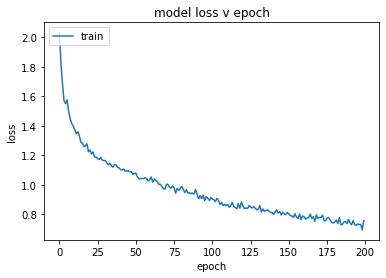

In [31]:
plt.plot(history.history['loss'])
plt.title('model loss v epoch')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train'], loc='upper left')
# plt.show()
plt.savefig(f'{assay}_model_loss.png')

# padel_model.save(f'{assay}_model')

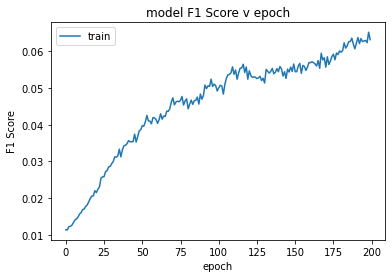

In [29]:
plt.plot(history.history['f1_score'])
plt.title('model F1 Score v epoch')
plt.ylabel('F1 Score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# plt.show()

plt.savefig(f'{assay}_model_f1.png')

In [33]:
model.save(f'{assay}_model')

INFO:tensorflow:Assets written to: 1511_model/assets


In [34]:
# padel_model.evaluate(x_test_np, y_test_np)

model.evaluate(x_test_np, y_test_np)

2319/2319 [==============================] - 3s 1ms/step - loss: 0.1920 - f1_score: 0.0272 - acc: 0.9321


[0.19196701049804688, 0.027184300124645233, 0.9321318864822388]

In [35]:
model.evaluate(x_test_actives, y_test_actives)

37/37 [==============================] - 0s 4ms/step - loss: 0.2130 - f1_score: 0.9820 - acc: 0.9644


[0.21300408244132996, 0.9819586277008057, 0.9644405841827393]

In [121]:
load_model = tf.keras.models.load_model(f'{assay}_model', custom_objects={'f1_score': f1_score_threshold()})

### EU-OS dataset

In [ ]:
#code etc

In [45]:
dbname = 'EU-OS_BIOACTIVES'
dbdir = 'EU-OS_OUTPUT'

In [46]:
try:
    os.mkdir(dbdir)    
except FileExistsError:
    print('Directory already exists')

In [15]:
euos_fpath = './EU-OS_BIOACTIVES/ECBD_bioactives.sdf'

In [16]:
euos_frame = PandasTools.LoadSDF(euos_fpath, smilesName='smiles', includeFingerprints=True)

,eos,smiles,inchi,inchikey,formula,mw,hba,hbd,tpsa,rb,fp3,logp,violates_ro5,pubchem,chembl,zinc,ID,ROMol
0,EOS100169,N=C(N)NCCC[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,InChI=1S/C27H41N9O7/c28-11-5-4-9-18-24(41)34-1...,NVHPXYIRNJFKTE-HAGHYFMRSA-N,C27H41N9O7,603.6810302734375,16,12,270.7200012207031,12,0.5185185074806213,-2.834929943084717,1,CID10196873,CHEMBL2332367,ZINC000003932526,EOS100169,
1,EOS100067,CCCC[C@]1(CC)CS(=O)(=O)c2cc(CNC(CC(=O)O)CC(=O)...,InChI=1S/C28H38N2O7S/c1-4-6-12-28(5-2)18-38(35...,CZGVOBIGEBDYTP-VSGBNLITSA-N,C28H38N2O7S,546.6859741210938,9,4,142.02999877929688,13,0.5,3.908099889755249,1,CID53492727,CHEMBL2387408,ZINC000096270862,EOS100067,
2,EOS100068,C[C@@H]1O[C@@]2(CS1)CN1CCC2CC1.Cl,InChI=1S/C10H17NOS.ClH/c1-8-12-10(7-13-8)6-11-...,SURWTGAXEIEOGY-GHXDPTCOSA-N,C10H18ClNOS,235.77999877929688,2,0,12.470000267028809,0,1.0,1.9819999933242798,0,CID123603,None,None,EOS100068,
3,EOS100069,CC(C)(C)c1cc(C=C(C#N)C#N)cc(Br)c1O,"InChI=1S/C14H13BrN2O/c1-14(2,3)11-5-9(4-10(7-1...",ABBADGFSRBWENF-UHFFFAOYSA-N,C14H13BrN2O,305.17498779296875,3,1,67.80999755859375,1,0.2857142984867096,3.8827600479125977,0,CID2044,CHEMBL2218926,ZINC000002391886,EOS100069,
4,EOS100001,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,InChI=1S/C46H56N4O10.H2O4S/c1-7-42(55)22-28-23...,AQTQHPDCURKLKT-PNYVAJAMSA-N,C46H58N4O14S,923.051025390625,18,5,245.77000427246094,8,0.5652173757553101,2.8647000789642334,1,CID5388992,None,None,EOS100001,

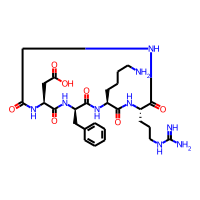
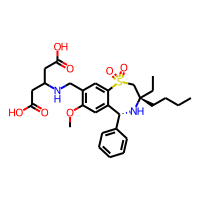
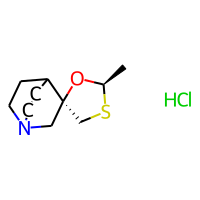
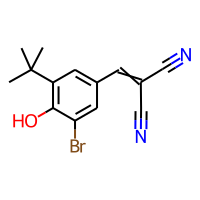
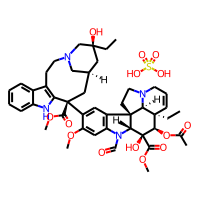

In [17]:
euos_frame.head(5)

In [18]:
cid_preproc = euos_frame.pubchem.values.tolist()

In [19]:
cid_preproc[0]

'CID10196873'

In [20]:
import re

In [50]:
for i in cid_preproc:
    match = re.search(r'^CID(\d*)', i, re.MULTILINE)
    CID_NUMBER = match.group(1)
    print(CID_NUMBER)
    break

10196873


In [18]:
existing_cid_list = []

In [16]:

with open(f'{assay}_cidlist.txt', 'r') as EXIST_CIDFILE:
    itera = EXIST_CIDFILE.readlines()
    for i in itera:
        i = i.rstrip()
        existing_cid_list.append(int(i))

In [17]:
existing_cid_list

[1988,
 425322,
 24981957,
 7384392,
 7423030,
 7526417,
 16268999,
 18573514,
 18577942,
 18582778,
 16803488,
 7385141,
 16304898,
 7634362,
 16300843,
 24982727,
 861616,
 17411863,
 16315231,
 18081004,
 16315571,
 17398524,
 9328183,
 17413839,
 16304462,
 17547928,
 7922758,
 8017512,
 7499814,
 8026252,
 2682930,
 24687840,
 24979081,
 24979082,
 24982829,
 16507495,
 24687442,
 24982517,
 24979548,
 24981610,
 24687441,
 24979089,
 8895736,
 18271743,
 16303892,
 24979449,
 24982038,
 16959432,
 8613313,
 24980237,
 16301776,
 24982763,
 8713385,
 17399871,
 16302716,
 16284861,
 24687427,
 2988593,
 7759290,
 24980843,
 482237,
 24687867,
 24982515,
 18578670,
 18228746,
 24979075,
 24981709,
 24979552,
 24357272,
 24981974,
 4221656,
 24979554,
 24979551,
 16303245,
 24687915,
 8124901,
 7351675,
 9467553,
 18208153,
 24978784,
 18075998,
 24979387,
 24980226,
 24983058,
 24983097,
 7965339,
 9115081,
 2699602,
 16285277,
 16300098,
 17394922,
 24983029,
 24983100,
 24981524,

In [60]:
total = len(cid_preproc)
nocid = 0

with open(f'{dbname}_cidlist.txt', 'w') as cidfile:
    for i in cid_preproc:
        try:
            match = re.search(r'^CID(\d*)', i, re.MULTILINE)
            CID_NUMBER = match.group(1)
            cidfile.write(str(CID_NUMBER) + '\n')
        except Exception:
            nocid += 1
        #cidfile.write(str(CID_NUMBER) + '\n')

print(f'Compounds with missing values: {nocid} out of {total} ({round((nocid/total) * 100, 2)})')

Compounds with missing values: 80 out of 2464 (3.25)


In [21]:
inp_db_fname = 'EUOS-bioactives'

In [22]:
# padel_desc_file = pd.read_csv(f'{assay}_descriptors.csv')
inp_db = pd.read_csv(f'{inp_db_fname}_descriptors.csv')

In [23]:
inp_db = inp_db.rename(columns={'Name': 'PUBCHEM_CID'})

In [24]:
inp_db.head(5)

,PUBCHEM_CID,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,123603,0,-0.1976,0.039046,50.5442,36.584274,0,0,32,14,...,0,0,0,0,0,0,0,0,0,0
1,2044,0,2.7996,7.837760,78.2778,39.360309,0,0,31,18,...,0,0,0,0,0,0,0,0,0,0
2,10196873,1,-5.7994,33.633040,140.6477,90.372513,0,0,84,43,...,0,0,0,0,0,0,0,0,0,0
3,53492727,2,-1.2697,1.612138,146.5083,85.332134,0,0,76,38,...,0,0,0,0,0,0,0,0,0,0
4,57363,0,0.8965,0.803712,103.4245,68.288548,0,0,63,27,...,0,0,0,0,0,0,0,0,0,0


In [80]:
INP_DB_CIDS = inp_db.PUBCHEM_CID.to_numpy()

In [32]:
import csv


column_names = []



with open(f'{dir}/{assay}_model_VT_features.txt', 'r') as colfile:
    reader = csv.reader(colfile)
    for ID, i in enumerate(reader):
        if ID == 0:
            headers = i
            column_names += i


In [34]:
len(column_names)

1824

In [86]:
inp_df = inp_db[inp_db.columns.intersection(column_names)]

In [90]:
INP_DB_CIDS = INP_DB_CIDS.tolist()

In [91]:
inp_df["PUBCHEM_CID"] = INP_DB_CIDS

/tmp/ipykernel_28651/2474907320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp_df["PUBCHEM_CID"] = INP_DB_CIDS


In [41]:
inp_df.head(5)

,nAcid,apol,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,...,PubchemFP865,PubchemFP866,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP872,PubchemFP873,PubchemFP875,PubchemFP878,PubchemFP880
0,0,36.584274,32,14,18,0,10,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,39.360309,31,18,13,0,14,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,90.372513,84,43,41,0,27,9,7,0,...,0,0,0,0,0,0,0,0,0,0
3,2,85.332134,76,38,38,0,28,2,7,1,...,0,0,0,0,0,0,0,0,0,0
4,0,68.288548,63,27,36,0,23,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
nan_cols = inp_df.isnull().sum(axis=0)
nan_cols.to_csv(f'{dbdir}/nancols.csv')

In [94]:
sum(nan_cols)

771

In [95]:
check_cols = pd.read_csv(f'{dbdir}/nancols3.csv')


In [96]:
check_cols.sort_values(by='0', ascending=False)

,Unnamed: 0,0
0,nAcid,0
1197,PubchemFP181,0
1223,PubchemFP207,0
1222,PubchemFP206,0
1221,PubchemFP205,0
...,...,...
604,nsOH,0
603,nssssNp,0
602,nsssN,0
601,ndsN,0


In [97]:
inp_df = inp_df[inp_df.columns[inp_df.isnull().sum() < 1000]]

In [98]:
nan_cols = inp_df.isnull().sum(axis=0)
nan_cols.to_csv(f'{dbdir}/nancols2.csv')

In [99]:
inp_df = inp_df.dropna()

In [100]:
nan_cols = inp_df.isnull().sum(axis=0)
nan_cols.to_csv(f'{dbdir}/nancols3.csv')

In [101]:
inf_vals = np.isfinite(inp_df).sum()

In [102]:
inf_vals.to_csv(f'{dbdir}/isfinite.csv')

In [103]:
dbfinite = pd.read_csv(f'{dbdir}/isfinite.csv')

In [104]:
dbfinite.sort_values(by='0', ascending=False)

,Unnamed: 0,0
0,nAcid,2260
1225,PubchemFP210,2260
1223,PubchemFP207,2260
1222,PubchemFP206,2260
1221,PubchemFP205,2260
...,...,...
178,ATSC2s,2040
179,ATSC3s,2040
61,ATS0s,2040
180,ATSC4s,2040


In [105]:
inp_df = inp_df.replace([np.inf, -np.inf], np.nan)

In [106]:
inp_df = inp_df.dropna()

In [108]:
np.isfinite(inp_df).sum()

nAcid           2040
apol            2040
nAtom           2040
nHeavyAtom      2040
nH              2040
                ... 
PubchemFP873    2040
PubchemFP875    2040
PubchemFP878    2040
PubchemFP880    2040
PUBCHEM_CID     2040
Length: 1824, dtype: int64

In [ ]:
# inf_vals = np.isfinite(inp_df).sum()

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# # selector = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
# dbselector = VarianceThreshold()
# VT_out = dbselector.fit_transform(np_padel_desc)
# selected_feature_names = dbselector.get_feature_names_out()


In [109]:
inp_df.head(5)

,nAcid,apol,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,...,PubchemFP866,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP872,PubchemFP873,PubchemFP875,PubchemFP878,PubchemFP880,PUBCHEM_CID
1,0,39.360309,31,18,13,0,14,2,1,0,...,0,0,0,0,0,0,0,0,0,2044
2,1,90.372513,84,43,41,0,27,9,7,0,...,0,0,0,0,0,0,0,0,0,10196873
3,2,85.332134,76,38,38,0,28,2,7,1,...,0,0,0,0,0,0,0,0,0,53492727
4,0,68.288548,63,27,36,0,23,2,2,0,...,0,0,0,0,0,0,0,0,0,57363
5,1,19.528758,17,11,6,0,7,0,4,0,...,0,0,0,0,0,0,0,0,0,72


In [110]:
INP_DB_CIDS = inp_df.PUBCHEM_CID.to_numpy()

In [111]:
inp_df = inp_df.drop(columns=['PUBCHEM_CID'])

In [112]:
inpbd_np = inp_df.to_numpy()

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dbScaler_out = scaler.fit_transform(inpbd_np)

In [118]:
print(Scaler_out.shape)
print(INP_DB_CIDS.shape)


(2040, 1823)
(2040,)


In [119]:
scaler_df = pd.DataFrame(dbScaler_out)

In [120]:
scaler_df.to_csv(f'{dbdir}/{dbname}_scaled_data.csv')

In [122]:
out = load_model.predict(dbScaler_out)

64/64 [==============================] - 1s 791us/step


2022-11-23 15:51:31.842988: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [126]:
DB_pred_df = pd.DataFrame(out, columns=['Predicted activity'])

In [127]:
DB_pred_df['PUBCHEM_CID'] = INP_DB_CIDS

In [128]:
DB_pred_df.head(5)

,Predicted activity,PUBCHEM_CID
0,0.135797,2044
1,0.029614,10196873
2,0.000022,53492727
3,0.696774,57363
4,0.732891,72


In [130]:
DB_pred_df = DB_pred_df.sort_values(by='Predicted activity', ascending=False)

In [131]:
DB_pred_df.head(5)

,Predicted activity,PUBCHEM_CID
1763,0.999074,16857
1508,0.997667,5819
275,0.997593,3728
1442,0.996835,5803
953,0.993383,31475


In [ ]:
DB_pred_df.to_csv(f'{dbdir}_predicted_inhibitors.csv')